In [1]:
import os 
from dotenv import load_dotenv
import pandas as pd
import requests
from binance import Client
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
# Invoking API keys
BINANCE_API_KEY=os.getenv('BINANCE_API_KEY')
BINANCE_SECRET_KEY=os.getenv('BINANCE_SECRET_KEY')
client = Client(BINANCE_API_KEY, BINANCE_SECRET_KEY, tld='us')


In [4]:
client = Client(BINANCE_API_KEY, BINANCE_SECRET_KEY, tld='us')

In [5]:
trades = client.get_historical_trades(symbol='SOLUSD')

klines = client.get_historical_klines("SOLUSD", Client.KLINE_INTERVAL_1DAY, "30 Apr, 2020", "30 Apr, 2022")

In [6]:
# Converting into a Dataframe
klines_df = pd.DataFrame(klines)

In [7]:
# Renaming columns to their correct labels
klines_df.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'NaN']


In [8]:
#print(klines_df).drop(columns='NaN')
klines_df['open_time'] = pd.to_datetime(klines_df['open_time'], unit='ms')

In [9]:
# Display Dataframe
klines_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,NaN
0,2020-09-18,3.0888,3.2926,2.8050,3.1002,41039.60000000,1600473599999,124683.8036,714,26548.92000000,81833.3694,0
1,2020-09-19,3.1002,3.2616,2.9846,3.0076,19297.28000000,1600559999999,59744.3755,686,7902.23000000,24579.4758,0
2,2020-09-20,3.0042,3.0042,2.7550,2.8737,21274.03000000,1600646399999,60928.1154,387,7266.20000000,20715.0029,0
3,2020-09-21,2.9110,3.0337,2.5500,2.7795,19867.49000000,1600732799999,55417.0202,345,10019.54000000,28579.9558,0
4,2020-09-22,2.7378,3.0089,2.6593,2.9629,58835.67000000,1600819199999,168942.4414,435,12448.52000000,35901.7861,0
...,...,...,...,...,...,...,...,...,...,...,...,...
585,2022-04-26,100.9758,102.0976,94.6210,95.7159,74880.17000000,1651017599999,7365647.2794,21625,38473.68000000,3785026.9001,0
586,2022-04-27,95.7381,100.7525,94.9235,98.3570,65655.07000000,1651103999999,6438104.7141,21021,33831.09000000,3317102.8450,0
587,2022-04-28,98.3136,100.5527,96.3708,98.2014,68097.56000000,1651190399999,6712283.8881,19725,33666.71000000,3319913.7655,0
588,2022-04-29,98.2356,98.7000,92.3313,93.9566,73629.15000000,1651276799999,7004742.3399,17715,37734.88000000,3589963.9147,0


In [10]:
# Fixing Data to replace closing price, open price, high, and low from an object to a float
klines_df['close'] = klines_df['close'].str.replace('','')
klines_df['close'] = klines_df['close'].str.replace('','')
klines_df['close'] = klines_df['close'].astype('float')

klines_df['open'] = klines_df['open'].str.replace('','')
klines_df['open'] = klines_df['open'].str.replace('','')
klines_df['open'] = klines_df['open'].astype('float')

klines_df['high'] = klines_df['high'].str.replace('','')
klines_df['high'] = klines_df['high'].str.replace('','')
klines_df['high'] = klines_df['high'].astype('float')

klines_df['low'] = klines_df['low'].str.replace('','')
klines_df['low'] = klines_df['low'].str.replace('','')
klines_df['low'] = klines_df['low'].astype('float')
klines_df.dtypes

open_time                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                  object
close_time                               int64
quote_asset_volume                      object
number_of_trades                         int64
taker_buy_base_asset_volume             object
taker_buy_quote_asset_volume            object
NaN                                     object
dtype: object

In [11]:
klines_csv_data = klines_df.to_csv('klines.csv', index = True)

In [11]:
# Calculate Daily Returns
klines_returns = klines_df['close'].pct_change()
klines_returns

0           NaN
1     -0.029869
2     -0.044521
3     -0.032780
4      0.065983
         ...   
585   -0.051673
586    0.027593
587   -0.001582
588   -0.043225
589   -0.099088
Name: close, Length: 590, dtype: float64

<AxesSubplot:title={'center':'EWM of Solana'}>

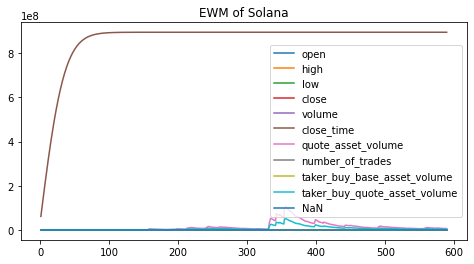

In [13]:
klines_ewm = klines_df.ewm(halflife=7).std()
klines_ewm.plot(figsize=(8,4),title='EWM of Solana')

<AxesSubplot:title={'center':'7 Day STD'}>

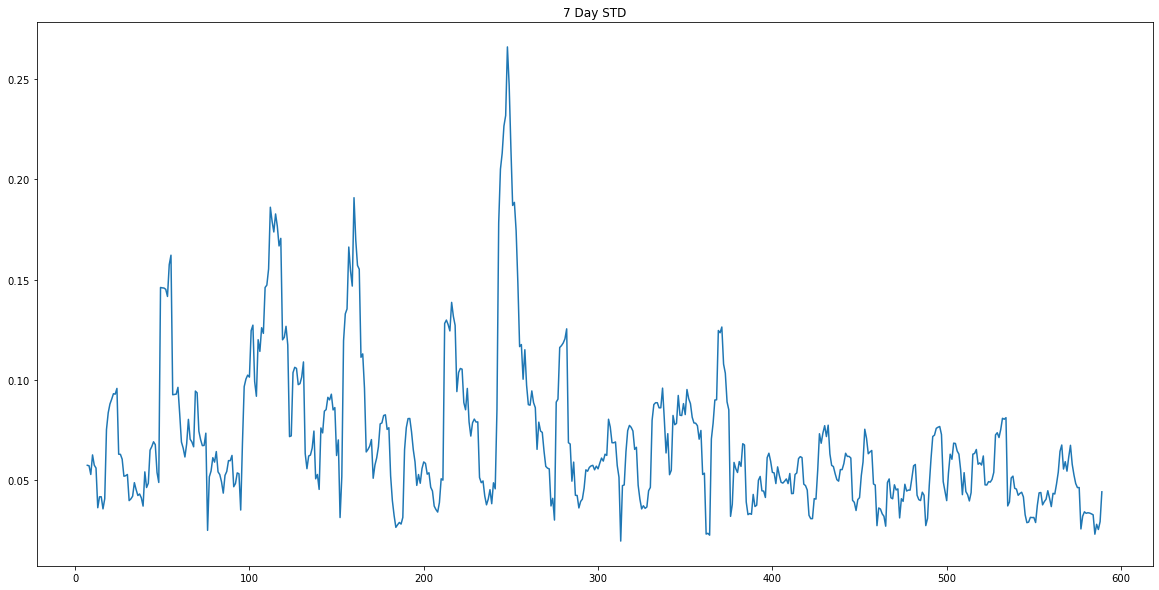

In [14]:
klines_returns.rolling(window=7).std().plot(figsize=(20,10), title='7 Day STD')

<AxesSubplot:title={'center':'Standard Moving Average of Solana'}>

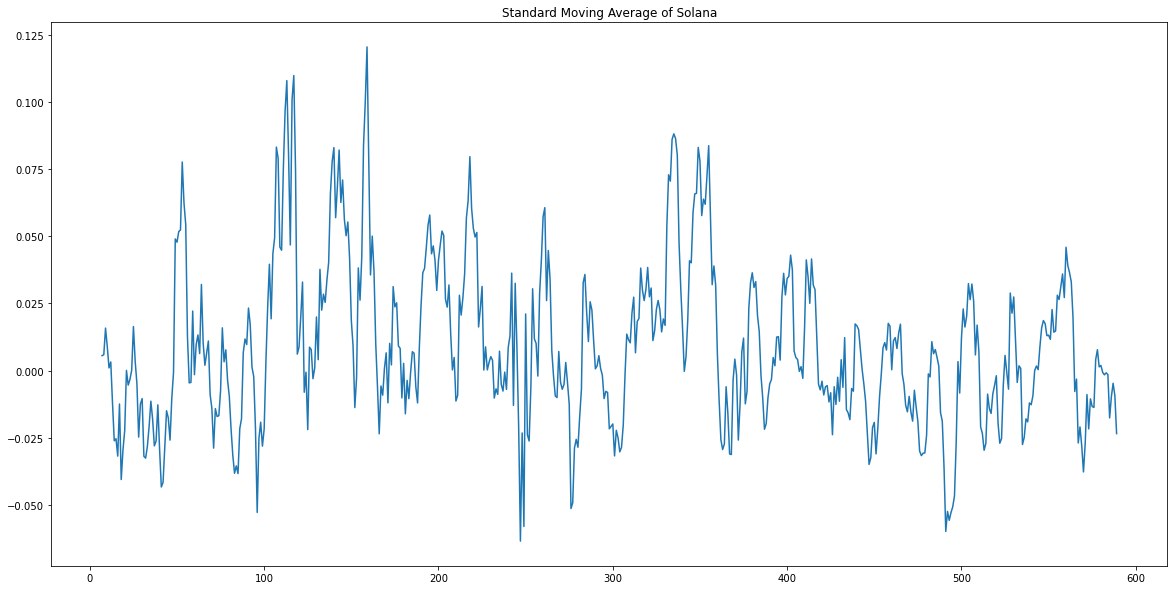

In [15]:
klines_sma = klines_returns.rolling(window=7).mean().plot(figsize=(20,10), title='Standard Moving Average of Solana')
klines_sma

# Create a reduced window to monitor 1 year's worth of data

### First Year of Observation

In [16]:
sol20_to_21 = client.get_historical_klines("SOLUSD", Client.KLINE_INTERVAL_1DAY, "30 Apr, 2020", "30 Apr, 2021")

In [17]:
# Setting data to a Dataframe
sol_df_1 = pd.DataFrame(sol20_to_21)

In [18]:
# Renaming columns
sol_df_1.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'NaN']

In [19]:
# Changing data to datetime
sol_df_1['open_time'] = pd.to_datetime(sol_df_1['open_time'], unit='ms')

In [20]:
# Displaying dataframe
sol_df_1

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,NaN
0,2020-09-18,3.0888,3.2926,2.8050,3.1002,41039.60000000,1600473599999,124683.8036,714,26548.92000000,81833.3694,0
1,2020-09-19,3.1002,3.2616,2.9846,3.0076,19297.28000000,1600559999999,59744.3755,686,7902.23000000,24579.4758,0
2,2020-09-20,3.0042,3.0042,2.7550,2.8737,21274.03000000,1600646399999,60928.1154,387,7266.20000000,20715.0029,0
3,2020-09-21,2.9110,3.0337,2.5500,2.7795,19867.49000000,1600732799999,55417.0202,345,10019.54000000,28579.9558,0
4,2020-09-22,2.7378,3.0089,2.6593,2.9629,58835.67000000,1600819199999,168942.4414,435,12448.52000000,35901.7861,0
...,...,...,...,...,...,...,...,...,...,...,...,...
220,2021-04-26,47.5674,48.5000,43.3755,43.9748,560296.64000000,1619481599999,25900770.3463,26103,278112.04000000,12863317.1527,0
221,2021-04-27,44.0626,46.6724,42.6514,43.3017,368441.49000000,1619567999999,16338546.1594,17112,184535.27000000,8197892.1256,0
222,2021-04-28,43.2011,46.9820,40.6938,44.9007,385344.27000000,1619654399999,17096238.1679,20262,193626.58000000,8616225.7776,0
223,2021-04-29,44.9007,46.1900,40.9200,42.6562,394068.10000000,1619740799999,17012561.6173,15122,210994.71000000,9104638.5992,0


In [21]:
# Changing data from an object to a float
sol_df_1['close'] = sol_df_1['close'].str.replace('','')
sol_df_1['close'] = sol_df_1['close'].str.replace('','')
sol_df_1['close'] = sol_df_1['close'].astype('float')

sol_df_1['open'] = sol_df_1['open'].str.replace('','')
sol_df_1['open'] = sol_df_1['open'].str.replace('','')
sol_df_1['open'] = sol_df_1['open'].astype('float')

sol_df_1['high'] = sol_df_1['high'].str.replace('','')
sol_df_1['high'] = sol_df_1['high'].str.replace('','')
sol_df_1['high'] = sol_df_1['high'].astype('float')

sol_df_1['low'] = sol_df_1['low'].str.replace('','')
sol_df_1['low'] = sol_df_1['low'].str.replace('','')
sol_df_1['low'] = sol_df_1['low'].astype('float')
sol_df_1.dtypes

open_time                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                  object
close_time                               int64
quote_asset_volume                      object
number_of_trades                         int64
taker_buy_base_asset_volume             object
taker_buy_quote_asset_volume            object
NaN                                     object
dtype: object

In [22]:
# 1st Year of Daily Returns
sol_1_returns = sol_df_1['close'].pct_change()
sol_1_returns

0           NaN
1     -0.029869
2     -0.044521
3     -0.032780
4      0.065983
         ...   
220   -0.078647
221   -0.015306
222    0.036927
223   -0.049988
224    0.005071
Name: close, Length: 225, dtype: float64

<AxesSubplot:title={'center':'EWM of Solana: 2020-2021'}>

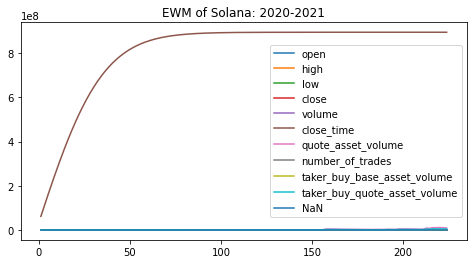

In [23]:
# 1st Year of Exponentialy Weighted Moving Average
sol_1_ewm = sol_df_1.ewm(halflife=7).std()
sol_1_ewm.plot(figsize=(8,4),title='EWM of Solana: 2020-2021')

<AxesSubplot:title={'center':'7 Day STD: 2020-2021'}>

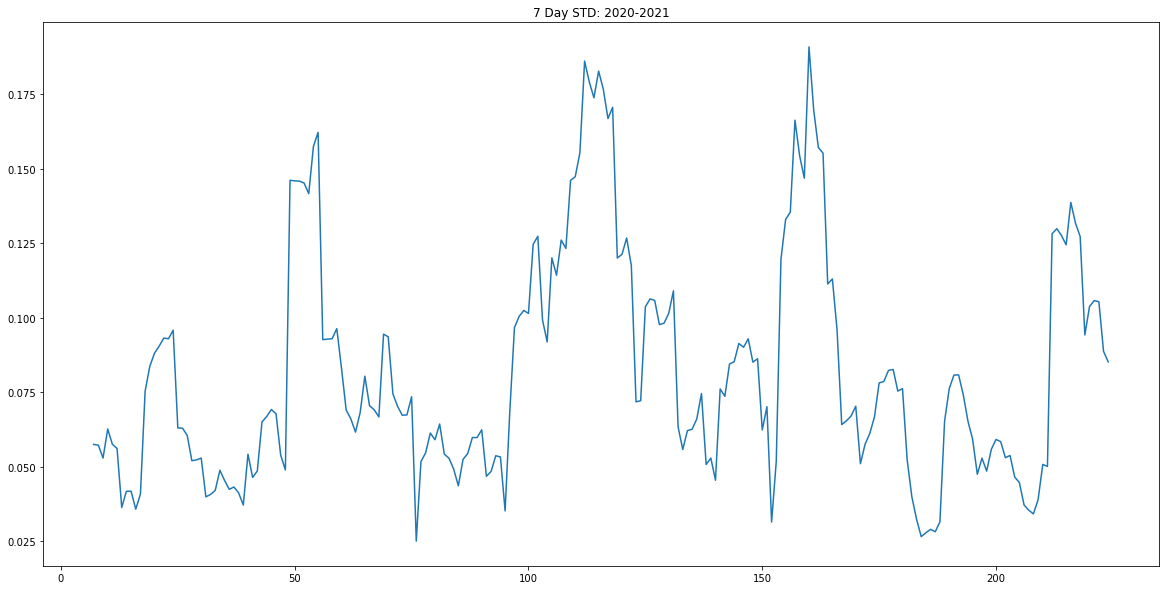

In [24]:
# 1st Year of Standard Deviation
sol_1_returns.rolling(window=7).std().plot(figsize=(20,10), title='7 Day STD: 2020-2021')

<AxesSubplot:title={'center':'Standard Moving Average of Solana: 2020-2021'}>

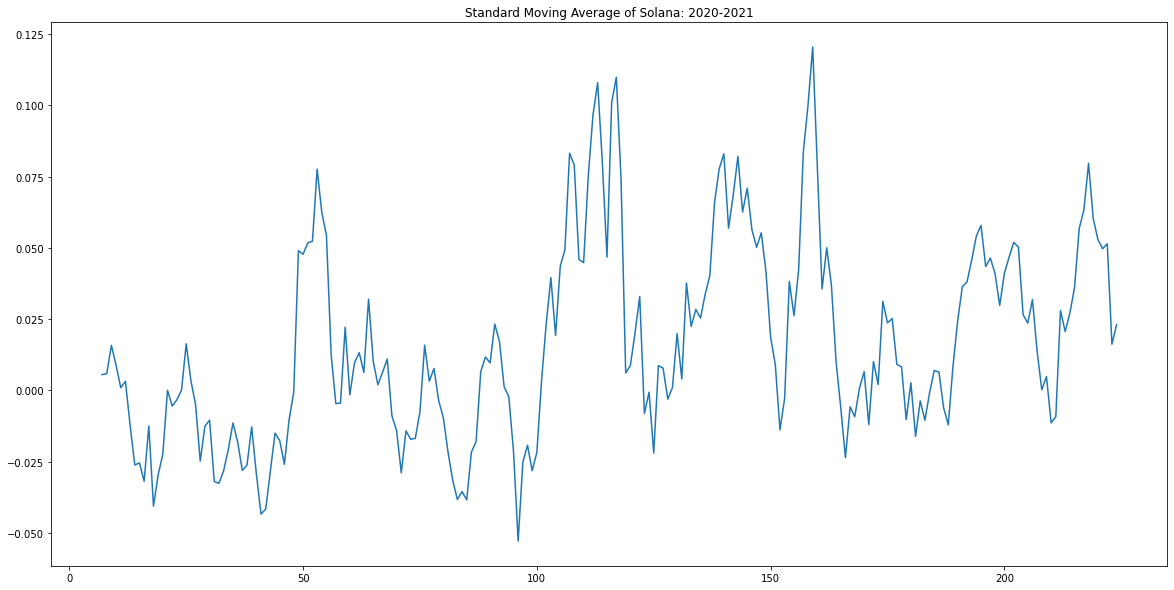

In [25]:
# 1st Year of Simple Moving Average
sol_1_sma = sol_1_returns.rolling(window=7).mean().plot(figsize=(20,10), title='Standard Moving Average of Solana: 2020-2021')
sol_1_sma

### Second Year of Observation (2021 - 2022)

In [26]:
sol21_to_22 = client.get_historical_klines("SOLUSD", Client.KLINE_INTERVAL_1DAY, "30 Apr, 2021", "30 Apr, 2022")

In [27]:
# Setting data to a Dataframe
sol_df_2 = pd.DataFrame(sol21_to_22)

In [28]:
# Renaming columns
sol_df_2.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'NaN']

In [29]:
# Changing data to datetime format
sol_df_2['open_time'] = pd.to_datetime(sol_df_2['open_time'], unit='ms')

In [30]:
# Displaying dataframe
sol_df_2

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,NaN
0,2021-04-30,42.6011,44.3202,41.2610,42.8725,291971.26000000,1619827199999,12536328.2346,15553,170856.14000000,7338943.7744,0
1,2021-05-01,42.8314,49.8999,42.0546,49.5669,308578.26000000,1619913599999,14275171.6291,21094,164166.17000000,7629589.6883,0
2,2021-05-02,49.6434,50.0000,46.0000,46.9400,183063.71000000,1619999999999,8706906.6801,11085,79771.46000000,3794755.2656,0
3,2021-05-03,46.8612,49.0564,44.8605,46.0835,295499.13000000,1620086399999,13871975.9652,14323,165806.53000000,7778366.7801,0
4,2021-05-04,46.0266,47.8005,42.2617,42.6093,296509.51000000,1620172799999,13298374.0273,16608,128082.84000000,5749387.7850,0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2022-04-26,100.9758,102.0976,94.6210,95.7159,74880.17000000,1651017599999,7365647.2794,21625,38473.68000000,3785026.9001,0
362,2022-04-27,95.7381,100.7525,94.9235,98.3570,65655.07000000,1651103999999,6438104.7141,21021,33831.09000000,3317102.8450,0
363,2022-04-28,98.3136,100.5527,96.3708,98.2014,68097.56000000,1651190399999,6712283.8881,19725,33666.71000000,3319913.7655,0
364,2022-04-29,98.2356,98.7000,92.3313,93.9566,73629.15000000,1651276799999,7004742.3399,17715,37734.88000000,3589963.9147,0


In [31]:
# Fixing datatype from object to float
sol_df_2['close'] = sol_df_2['close'].str.replace('','')
sol_df_2['close'] = sol_df_2['close'].str.replace('','')
sol_df_2['close'] = sol_df_2['close'].astype('float')

sol_df_2['open'] = sol_df_2['open'].str.replace('','')
sol_df_2['open'] = sol_df_2['open'].str.replace('','')
sol_df_2['open'] = sol_df_2['open'].astype('float')

sol_df_2['high'] = sol_df_2['high'].str.replace('','')
sol_df_2['high'] = sol_df_2['high'].str.replace('','')
sol_df_2['high'] = sol_df_2['high'].astype('float')

sol_df_2['low'] = sol_df_2['low'].str.replace('','')
sol_df_2['low'] = sol_df_2['low'].str.replace('','')
sol_df_2['low'] = sol_df_2['low'].astype('float')
sol_df_2.dtypes

open_time                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                  object
close_time                               int64
quote_asset_volume                      object
number_of_trades                         int64
taker_buy_base_asset_volume             object
taker_buy_quote_asset_volume            object
NaN                                     object
dtype: object

In [32]:
# 2nd Year of Daily Returns
sol_2_returns = sol_df_2['close'].pct_change()
sol_2_returns

0           NaN
1      0.156147
2     -0.052997
3     -0.018247
4     -0.075389
         ...   
361   -0.051673
362    0.027593
363   -0.001582
364   -0.043225
365   -0.099088
Name: close, Length: 366, dtype: float64

<AxesSubplot:title={'center':'EWM of Solana: 2021-2022'}>

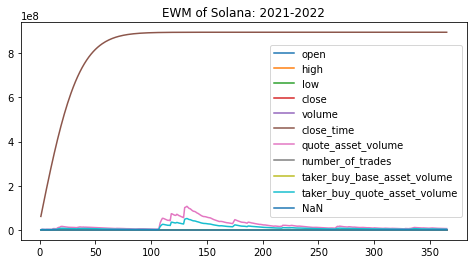

In [33]:
# 2nd Year of Exponentialy Weighted Moving Average
sol_2_ewm = sol_df_2.ewm(halflife=7).std()
sol_2_ewm.plot(figsize=(8,4),title='EWM of Solana: 2021-2022')

<AxesSubplot:title={'center':'7 Day STD: 2021-2022'}>

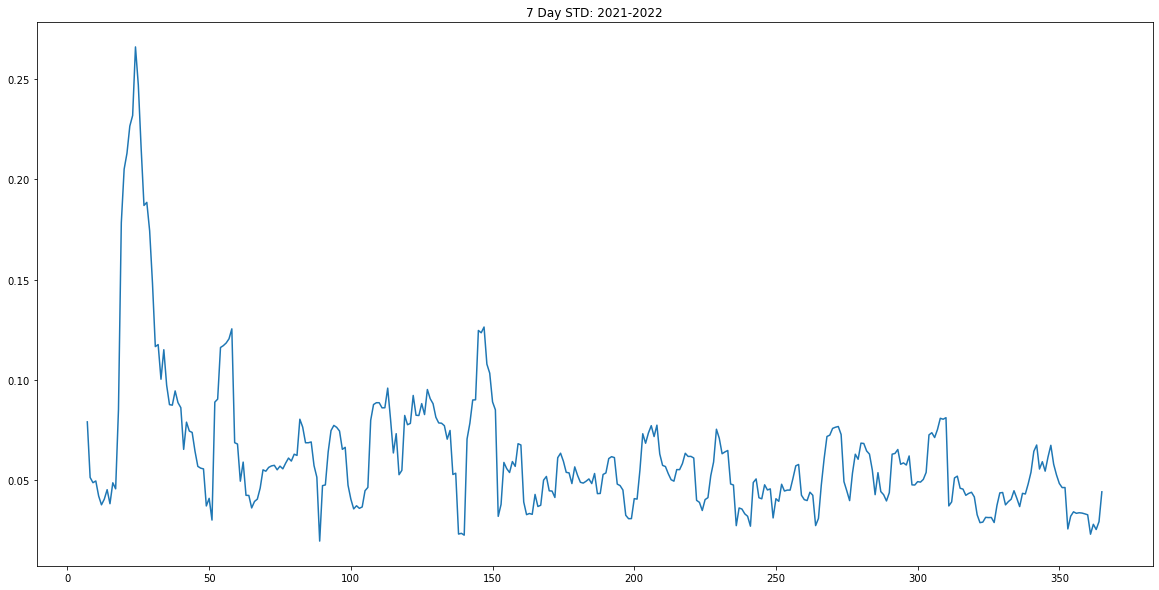

In [34]:
# 2nd Year Standard Deviation
sol_2_returns.rolling(window=7).std().plot(figsize=(20,10), title='7 Day STD: 2021-2022')

<AxesSubplot:title={'center':'Standard Moving Average of Solana: 2021-2022'}>

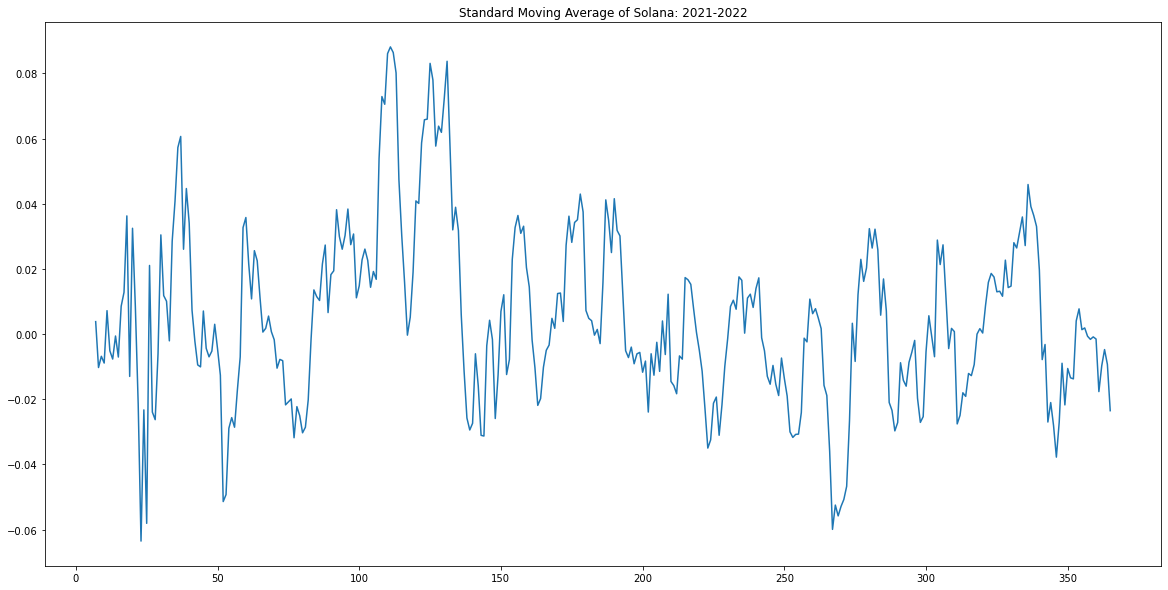

In [35]:
# 2nd Year of Simple Moving Average
sol_2_sma = sol_2_returns.rolling(window=7).mean().plot(figsize=(20,10), title='Standard Moving Average of Solana: 2021-2022')
sol_2_sma